# Notebooks for Fraud Detection Project

Two ready-to-run notebook skeletons you can copy into Jupyter (or open & run in VS Code): 01_eda.ipynb and 02_experiments.ipynb.

## 01_EDA.ipynb — Exploratory Data Analysis

### 0 - Title & Objective

- EDA: Exploratory Data Analysis
Objective: Quick, reproducible EDA on creditcard dataset. Produce summary tables, class imbalance checks, basic plots, correlation, PCA visualization and save cleaned / sampled data for experiments.

### 1- Install / Imports 

In [46]:
import sys
sys.path.append('E:\My_Project\Fruad_Detection\src')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from features import add_simple_features

pd.set_option("display.max_columns", 200)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Kourosh\AppData\Local\Temp\ipykernel_11624\2557958582.py:2: SyntaxWarning: invalid escape sequence '\M'
  sys.path.append('E:\My_Project\Fruad_Detection\src')


### 2- Load data 

In [ ]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3- Quick info & missing values 

In [48]:
print(df.shape)
df.info()
df.describe()
df.isnull().sum()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 4- Class distribution & basic stats 

In [49]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

# Amount stats
print(df['Amount'].describe())

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


### 5- Visuals: Amount & Time 

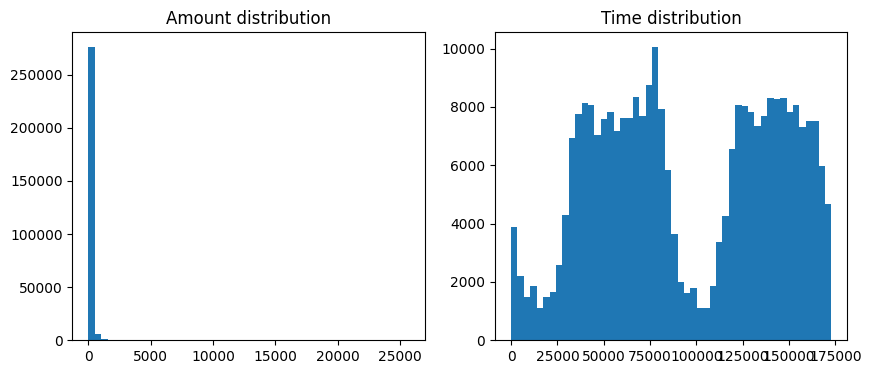

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=50)
plt.title('Amount distribution')


plt.subplot(1,2,2)
plt.hist(df['Time'], bins=50)
plt.title('Time distribution')
plt.show()

### 6- Boxplot/Amoubt by class 

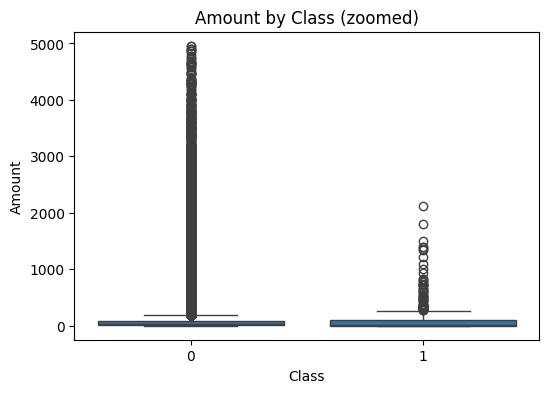

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df[df['Amount']<5000])
plt.title('Amount by Class (zoomed)')
plt.show()

### 7- Correlation heatmap 

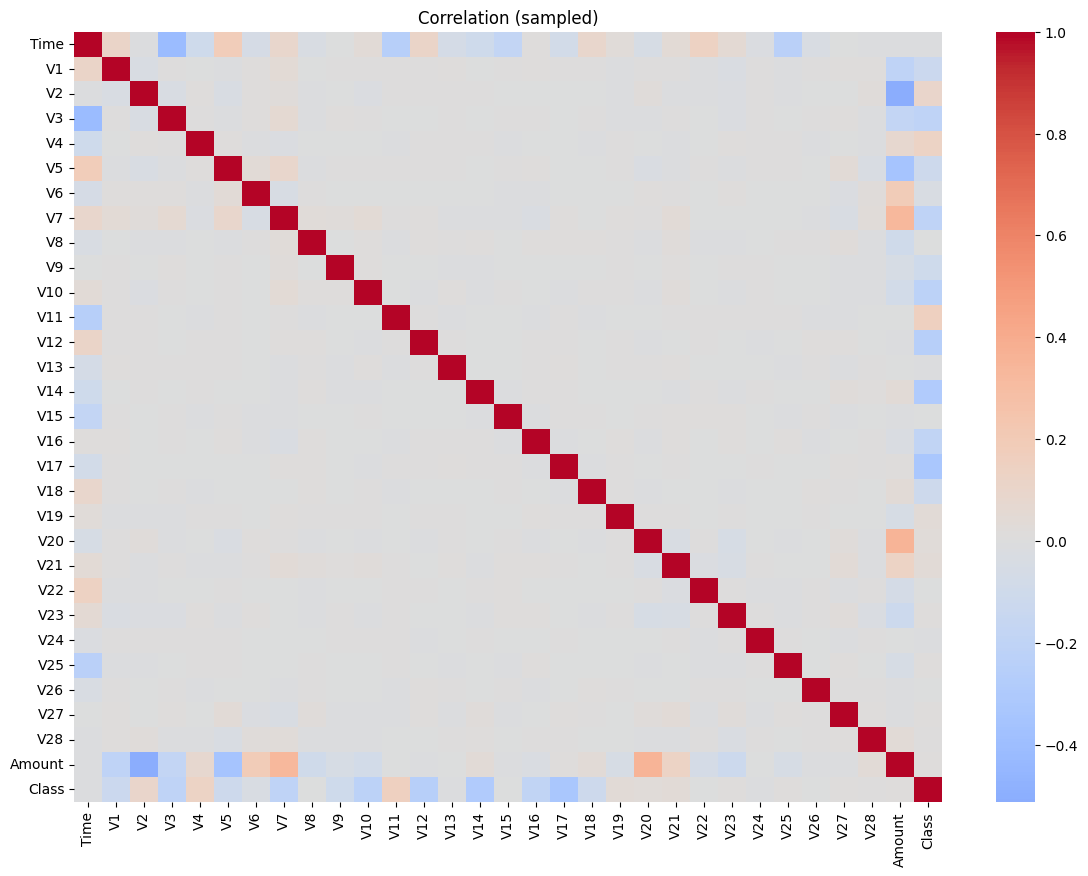

In [52]:
sample = df.sample(frac=0.2, random_state=42)
plt.figure(figsize=(14,10))
sns.heatmap(sample.corr(), cmap='coolwarm', center=0)
plt.title('Correlation (sampled)')
plt.show()

### 8- Feature distributions for selected V's 

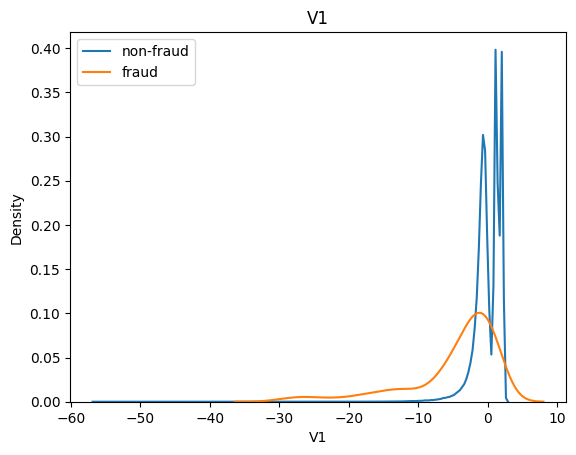

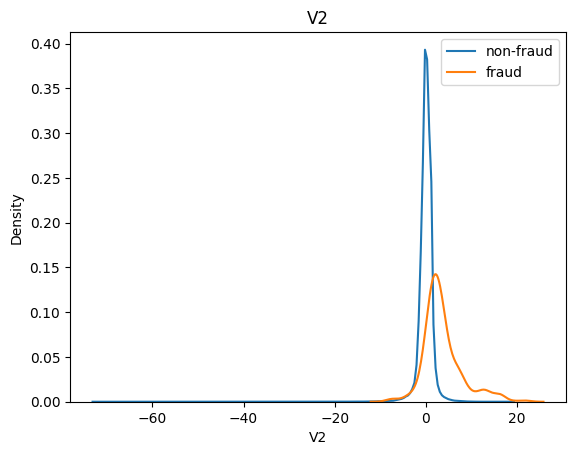

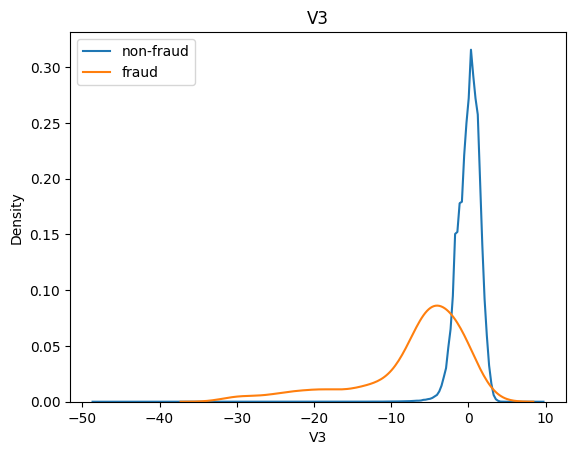

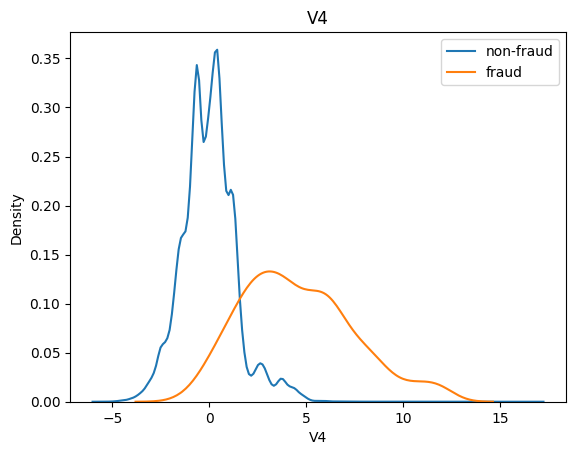

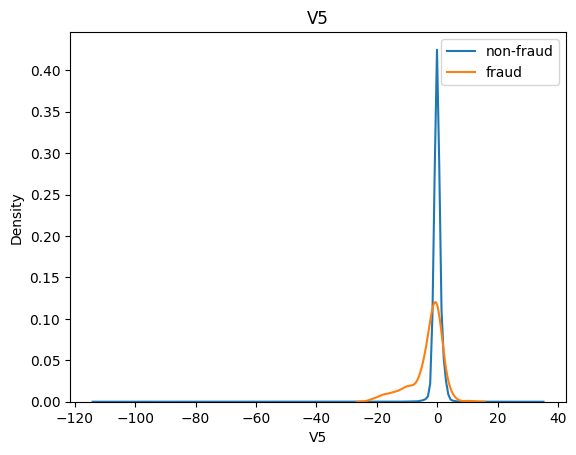

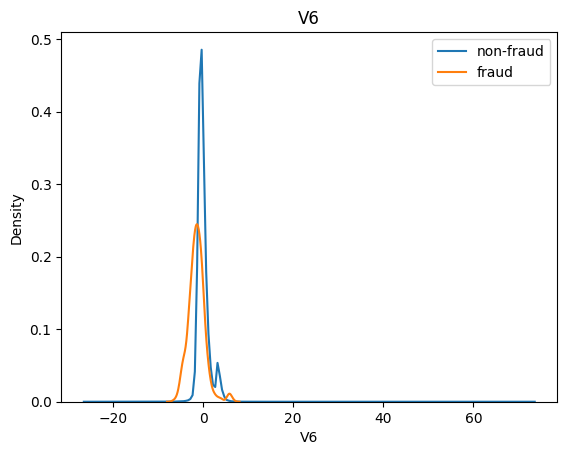

In [53]:
cols = ['V1','V2','V3','V4','V5','V6']
for c in cols:
    plt.figure()
    sns.kdeplot(df.loc[df['Class']==0, c], label='non-fraud', bw_adjust=1)
    sns.kdeplot(df.loc[df['Class']==1, c], label='fraud', bw_adjust=1)
    plt.title(c)
    plt.legend()
    plt.show()

### 9 - PCA 2D visual 

e:\My_Project\Fruad_Detection\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


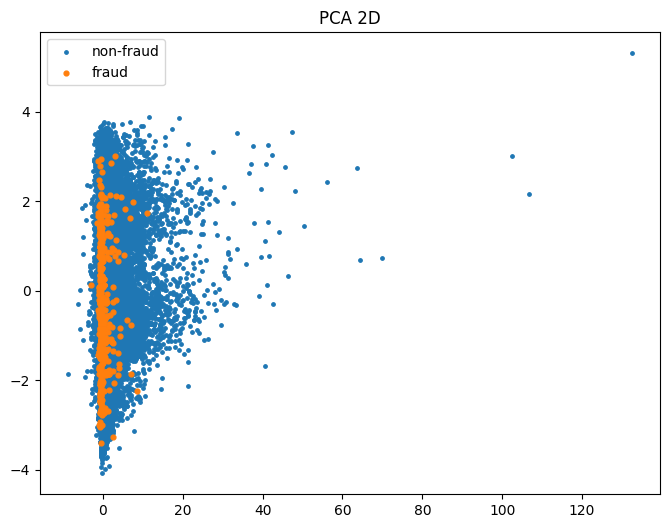

In [54]:
X = df.drop(columns=['Class'])
X_scaled = StandardScaler().fit_transform(X)
px = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(px[df['Class']==0,0], px[df['Class']==0,1], s=6, label='non-fraud')
plt.scatter(px[df['Class']==1,0], px[df['Class']==1,1], s=12, label='fraud')
plt.legend()
plt.title('PCA 2D')
plt.show()

### 10 - Add simple features & save processed sample

In [55]:
# add lightweight engineered features
df_proc = add_simple_features(df)
# save a sampled processed file for experiments (don't push raw data to repo)
os.makedirs('data/processed', exist_ok=True)
df_proc.sample(frac=0.2, random_state=42).to_csv('data/processed/creditcard_sample.csv', index=False)
print('Saved data/processed/creditcard_sample.csv')

Saved data/processed/creditcard_sample.csv


### 11 - EDA conclusions

- Note key imbalances and recommend metrics (PR-AUC, recall) and CV strategy (StratifiedKFold).
- Save notes about suspicious features and any preprocessing to keep for experiments.

## 02_experiments.ipynb — Experiments & CV

### 0 - Title & Objective

- Experiments: model comparison & cross-validation
- Objective: run reproducible experiments with cross-validation from the start (StratifiedKFold), compare baseline models, tune RandomForest / XGBoost, save best model and metrics.

### 1- Imports

In [56]:
import sys
sys.path.append('E:\My_Project\Fruad_Detection\src')
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, roc_auc_score, average_precision_score
import joblib


# imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


# project helpers
from features import add_simple_features
from evaluate import plot_pr_curve, plot_confusion


# reproducibility
RANDOM_STATE = 42

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Kourosh\AppData\Local\Temp\ipykernel_11624\4154928272.py:2: SyntaxWarning: invalid escape sequence '\M'
  sys.path.append('E:\My_Project\Fruad_Detection\src')


### 2 - Load data

In [ ]:
# try processed sample first, fallback to raw
proc_path = 'data/processed/creditcard_sample.csv'
if os.path.exists(proc_path):
    df = pd.read_csv(proc_path)
else:
    df = pd.read_csv("../data/raw/creditcard.csv")


# basic split
X = df.drop(columns=['Class'])
y = df['Class']

### 3- Define CV and scoring

In [58]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {
 'roc_auc': 'roc_auc',
'pr_auc': 'average_precision',
'recall': make_scorer(recall_score),
'precision': make_scorer(precision_score)
}

### 4 - Baseline: Logistic Regression with class weight

In [59]:
pipe_lr = Pipeline([
('scaler', StandardScaler()),
('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE))
])


scores_lr = cross_validate(pipe_lr, X, y, cv=skf, scoring=scoring, return_train_score=False, n_jobs=-1)
print('LogReg mean PR-AUC:', np.mean(scores_lr['test_pr_auc']))
print('LogReg mean ROC-AUC:', np.mean(scores_lr['test_roc_auc']))

LogReg mean PR-AUC: 0.6571362699852681
LogReg mean ROC-AUC: 0.9604744852453475


### 5- Random Forest with SMOTE in pipeline

In [60]:
pipe_rf = ImbPipeline([
('scaler', StandardScaler()),
('smote', SMOTE(random_state=RANDOM_STATE)),
('clf', RandomForestClassifier(n_estimators=100, class_weight=None, random_state=RANDOM_STATE, n_jobs=-1))
])


scores_rf = cross_validate(pipe_rf, X, y, cv=skf, scoring=scoring, return_train_score=False, n_jobs=-1)
print('RF mean PR-AUC:', np.mean(scores_rf['test_pr_auc']))
print('RF mean ROC-AUC:', np.mean(scores_rf['test_roc_auc']))

RF mean PR-AUC: 0.8404065300323517
RF mean ROC-AUC: 0.9729991809839571


### 6- Hyperparameter tuning: GridSearchCV for RF

In [ ]:
param_grid = {
'clf__n_estimators': [50, 100],
'clf__max_depth': [None, 10, 20],
'clf__min_samples_leaf': [1, 3, 5]
}


gs = GridSearchCV(pipe_rf, param_grid, scoring='average_precision', cv=skf, n_jobs=-1, verbose=2)
gs.fit(X, y)
print('Best params:', gs.best_params_)
print('Best PR-AUC:', gs.best_score_)


# save best model
os.makedirs('models', exist_ok=True)
joblib.dump(gs.best_estimator_, '../models/best_rf_pipeline.joblib')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'clf__max_depth': 20, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 100}
Best PR-AUC: 0.8411393031649521


['models/best_rf_pipeline.joblib']

### 7- Final evaluation on hold-out (if available)

ROC-AUC: 0.9881385738151762


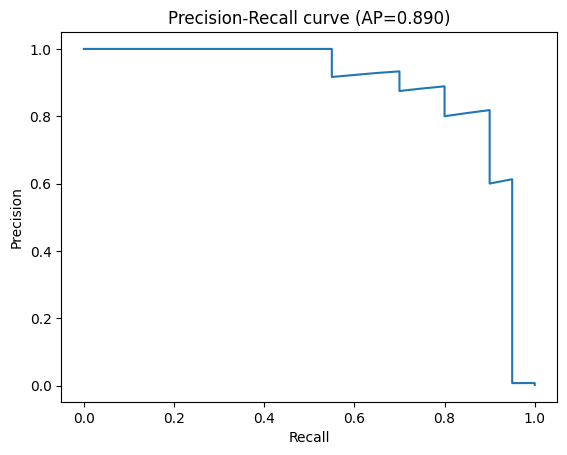

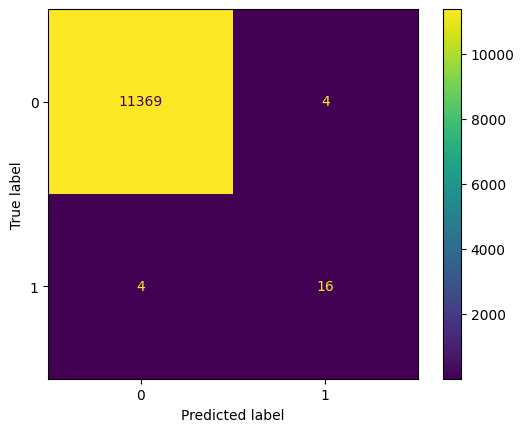

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay

def plot_pr_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall curve (AP={ap:.3f})")
    plt.show()

def plot_confusion(y_true, y_pred, labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()

# if you have a holdout test set, do final eval here. Example splitting:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)


best = gs.best_estimator_
best.fit(X_train, y_train)
probs = best.predict_proba(X_test)[:,1]
preds = (probs >= 0.5).astype(int)


print('ROC-AUC:', roc_auc_score(y_test, probs))
plot_pr_curve(y_test, probs)
plot_confusion(y_test, preds)


# save final metrics
os.makedirs('../reports', exist_ok=True)
from sklearn.metrics import classification_report
with open('../reports/classification_report_final.txt','w') as f:
    f.write(classification_report(y_test, preds))
with open('../reports/roc_auc_final.txt','w') as f:
    f.write(str(roc_auc_score(y_test, probs)))

### 8- Experiments logging

In [65]:
# collect simple summary
results = {
'model': ['LogReg','RF'],
'pr_auc': [np.mean(scores_lr['test_pr_auc']), np.mean(scores_rf['test_pr_auc'])],
'roc_auc': [np.mean(scores_lr['test_roc_auc']), np.mean(scores_rf['test_roc_auc'])]
}
res_df = pd.DataFrame(results)
res_df.to_csv('../reports/experiments_summary.csv', index=False)
print('Saved reports/experiments_summary.csv')

Saved reports/experiments_summary.csv


### 9- Notes & next steps

- Try XGBoost / LightGBM and Optuna for faster tuning.
- Use full dataset only after pipeline & tests pass on sample.
- Keep cross-validation as default practice for every experiment.